importing Jupyter notebook from Content_based_filtering.ipynb
(1681, 9)
1681 1681
importing Jupyter notebook from Collaborative_filtering_RBM.ipynb
   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596
100000
943
0.3490402
0.31800547
0.28786623
0.27976692
0.2568149
0.2105333
0.17393799
0.15816787
0.14430654
0.13939673
0.1334827
0.12850602
0.12787418
0.12757887
0.130101
0.12737611
0.12456007
0.123686865
0.12566136
0.12291177
0.122236416
0.1213167
0.118358664
0.11786186
0.11545688
0.11684819
0.114565395
0.113824986
0.11338542
0.11145101
0.10978153
0.1091633
0.109407686
0.109786585
0.10807663
0.10594679
0.1050408
0.104863904
0.10314916
0.10329379
0.10091768
0.1014339
0.100449875
0.100006275
0.0997551
0.099023886
0.0973278
0.09680666
0.09682066
0.09540842


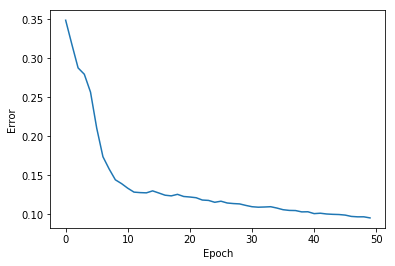

Enter the UserID : 20
List of the movies he/she rated: 
List of movies suggested to watch: 
importing Jupyter notebook from Front_End_Widget.ipynb
Choose your options: 


/home/sumanthvrao/anaconda3/envs/deepl/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


interactive(children=(Checkbox(value=False, description='age'), Checkbox(value=False, description='sex'), Chec…

In [1]:
#importing all necessary librarys
import import_ipynb
import Content_based_filtering as cf
import Collaborative_filtering_RBM as rbm
from scipy.io import loadmat
import pandas as pd
import numpy as np
from IPython.display import display
import Front_End_Widget as few
from IPython.display import display
from IPython.html import widgets
import tensorflow as tf
import matplotlib.pyplot as plt

# Front End for user

In [2]:
top10ids=[]
dic=loadmat('top10.mat')

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
user_df = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols, 
                    encoding='latin-1', parse_dates=True)

movies_df=pd.read_csv('ml-100k/item_cc.csv') #Movie details

movies_df2=pd.read_csv('ml-100k/item_cc_genre.csv')

matrix=pd.read_csv('ml-100k/user_item_matrix.csv')

new_prediction=pd.read_csv('ml-100k/new_predicted_colab.csv')


In [3]:
m=np.zeros(shape=(943+1,1682+1)).astype(int)
p=pd.read_csv("ml-100k/new_predicted_colab.csv")
p=p.values
for i in p:
    try:
    
        m[int(i[0])][int(i[1])]=int(i[2])
    except:
        print(i)
np.savetxt("ml-100k/only_predicted.csv", m.astype(int), fmt='%i', delimiter=",")


In [4]:
only_predicted=pd.read_csv('ml-100k/only_predicted.csv')

In [5]:
flag=0

def getusers(uname,movieid): #Suggest users who would rate this movie the same as current user

    rating=matrix.iloc[uname][movieid]
    print("you're going to rate this movie: ",rating)
    print("---------------------------------------------------------------------")
    print("your partners are (They also rated",rating,")")
    h=only_predicted.loc[only_predicted.iloc[:,movieid]==rating]
    l=h.index.tolist()
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        final_user_frame = user_df.loc[user_df['user_id'].isin(l)]
        few.filter_data(final_user_frame)
    print("---------------------------------------------------------------------")

#driver(196,242)

In [6]:

def gettop(uname): #Top 10 movies which the user is going to rate high
    print("You may like:")
    ll=dic[str(uname)][0]
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(movies_df2.loc[movies_df['movie_id'].isin(ll)])
    print("---------------------------------------------------------------------")
    

In [7]:
def driver(uname, movieid=""):
    
    gettop(uname)
    if(movieid!=""):
        movietitle=movies_df2.loc[movies_df['movie_id']==int(movieid),'movie_title'].iloc[0]
        if(m[uname][movieid]!=0):
            getusers(uname,movieid)
        else:
            print("You have already watched this movie")
            
        print("Similar movies are")
        ans=cf.get_recommendations(movietitle)
        
        lll=ans[0].tolist()
        df2=movies_df2['movie_title'].str.lower().to_frame()
        df2=df2['movie_title'].str.strip().to_frame()
        df3=movies_df2[['genre','year','director','actor1','actor2']]
        df3=pd.concat([df2, df3], axis=1)


        with pd.option_context('display.max_rows', None, 'display.max_columns', None):
            display(df3.loc[df3['movie_title'].isin(lll)]) 
    print("---------------------------------------------------------------------")
    
        

In [8]:
driver(4,1)

You may like:


,genre,movie_id,movie_title,year,tmdb_id,director,actor1,actor2
97,Drama Thriller,98,"Silence of the Lambs, The",1991,274,Jonathan Demme,Jodie Foster,Anthony Hopkins
164,Drama,165,Jean de Florette,1986,4480,Claude Berri,Yves Montand,Gérard Depardieu
207,Comedy Horror,208,Young Frankenstein,1974,3034,Mel Brooks,Gene Wilder,Peter Boyle
300,Crime Film-Noir Mystery Thriller,302,L.A. Confidential,1997,2118,Curtis Hanson,Kevin Spacey,Guy Pearce
425,Drama,427,To Kill a Mockingbird,1962,595,Robert Mulligan,Gregory Peck,Mary Badham
472,Sci-Fi War,474,Dr. Strangelove or: How I Learned to Stop Worr...,1963,935,Stanley Kubrick,Peter Sellers,George C. Scott
478,Comedy Thriller,480,North by Northwest,1959,213,Alfred Hitchcock,Cary Grant,Eva Marie Saint
496,Action Adventure Romance War,498,"African Queen, The",1951,488,John Huston,Humphrey Bogart,Katharine Hepburn
513,Action Drama War,515,"Boot, Das",1997,387,Wolfgang Petersen,Jürgen Prochnow,Herbert Grönemeyer
601,Mystery Thriller,603,Rear Window,1954,567,Alfred Hitchcock,James Stewart,Grace Kelly


---------------------------------------------------------------------
you're going to rate this movie:  4
---------------------------------------------------------------------
your partners are (They also rated 4 )
Choose your options: 


interactive(children=(Checkbox(value=False, description='age'), Checkbox(value=False, description='sex'), Chec…

---------------------------------------------------------------------
Similar movies are


,movie_title,genre,year,director,actor1,actor2
7,babe,Children's Comedy Drama,1995,Chris Noonan,Christine Cavanaugh,Miriam Margolyes
25,"brothers mcmullen, the",Comedy,1995,Edward Burns,Shari Albert,Maxine Bahns
62,"santa clause, the",Children's Comedy,1994,John Pasquin,Tim Allen,Judge Reinhold
94,aladdin,Animation Children's Comedy Musical,1992,Ron Clements,Scott Weinger,Robin Williams
420,aladdin and the king of thieves,Animation Children's Comedy,1996,Tad Stones,Scott Weinger,Linda Larkin
540,pocahontas,Animation Children's Musical Romance,1995,Mike Gabriel,Irene Bedard,Mel Gibson
558,"kid in king arthur's court, a",Adventure Children's Comedy Fantasy Romance Sc...,1995,Michael Gottlieb,Thomas Ian Nicholas,Joss Ackland
818,space jam,Adventure Animation Children's Comedy Fantasy,1996,Joe Pytka,Michael Jordan,Wayne Knight
843,that thing you do!,Comedy,1996,Tom Hanks,Tom Everett Scott,Johnathon Schaech
991,hercules,Adventure Animation Children's Comedy Musical,1997,John Musker,Tate Donovan,Josh Keaton


---------------------------------------------------------------------


In [16]:
from ipywidgets import Button, Layout
movieid=""
uname = int(input("Enter User ID: "))
movieid = input("Enter Movie ID (Optional): ")
button1 = widgets.Button(description="Contest Based Movie Recommendation",layout=Layout(width='50%', height='40px'))
button2 = widgets.Button(description="Collaborative Based Recommendation for users and movies",layout=Layout(width='50%', height='40px'))
button3 = widgets.Button(description="RBM Based Movie Recommendation",layout=Layout(width='50%', height='40px'))

display(button1)
display(button2)
display(button3)

list_of_rated = rbm.list_of_rated(uname)
display(list_of_rated.head())

movietitle=""
if(movieid!=""):
    global movietitle
    movietitle=movies_df2.loc[movies_df['movie_id']==int(movieid),'movie_title'].iloc[0]
def content_based(b):
    if(movieid!=""):
        print("Similar movies are")
        ans=cf.get_recommendations(movietitle)
        lll=ans[0].tolist()
        df2=movies_df2['movie_title'].str.lower().to_frame()
        df2=df2['movie_title'].str.strip().to_frame()
        df3=movies_df2[['genre','year','director','actor1','actor2']]
        df3=pd.concat([df2, df3], axis=1)
        with pd.option_context('display.max_rows', None, 'display.max_columns', None):
            display(df3.loc[df3['movie_title'].isin(lll)]) 
    print("---------------------------------------------------------------------")
    
def collaborative_based(b):
    gettop(uname)
    if(movieid!=""):
        movietitle=movies_df2.loc[movies_df['movie_id']==int(movieid),'movie_title'].iloc[0]
        if(m[uname][int(movieid)]!=0):
            getusers(uname,int(movieid))
        else:
            print("You have already watched this movie")
        
    
def RBM_based(b):
    rbm_op = rbm.suggested_to_watch(uname)
    rbm_op = rbm_op.sort_values(['Generated Score'], ascending=False).head(10)
    display(rbm_op)
button1.on_click(content_based)
button2.on_click(collaborative_based)
button3.on_click(RBM_based)

Enter User ID: 20
Enter Movie ID (Optional): 4


Button(description='Contest Based Movie Recommendation', layout=Layout(height='40px', width='50%'), style=Butt…

Button(description='Collaborative Based Recommendation for users and movies', layout=Layout(height='40px', wid…

Button(description='RBM Based Movie Recommendation', layout=Layout(height='40px', width='50%'), style=ButtonSt…

List of the movies he/she rated: 


,movie_id,movie_title,release_date
287,288,Scream (1996),20-Dec-1996
207,208,Young Frankenstein (1974),01-Jan-1974
10,11,Seven (Se7en) (1995),01-Jan-1995
175,176,Aliens (1986),01-Jan-1986
117,118,Twister (1996),10-May-1996


You may like:


,genre,movie_id,movie_title,year,tmdb_id,director,actor1,actor2
58,Drama,59,Three Colors: Red,1994,110,Krzysztof Kieślowski,Irène Jacob,Jean-Louis Trintignant
113,Animation,114,Wallace & Gromit: The Best of Aardman Animation,1996,532,Nick Park,Peter Sallis,Anne Reid
168,Animation Comedy,169,"Wrong Trousers, The",1993,531,Nick Park,Peter Sallis,NaN
311,Action Drama Romance,313,Titanic,1997,597,James Cameron,Kate Winslet,Leonardo DiCaprio
406,Animation Comedy Thriller,408,"Close Shave, A",1996,532,Nick Park,Peter Sallis,Anne Reid
481,Drama Romance War,483,Casablanca,1942,289,Michael Curtiz,Humphrey Bogart,Ingrid Bergman
486,Film-Noir,488,Sunset Blvd.,1950,599,Billy Wilder,William Holden,Gloria Swanson
894,Drama,896,"Sweet Hereafter, The",1997,10217,Atom Egoyan,Ian Holm,Caerthan Banks
919,Drama Romance,921,Farewell My Concubine,1993,10997,Chen Kaige,Leslie Cheung,Gong Li
1192,Crime Drama,1194,Once Were Warriors,1994,527,Lee Tamahori,Rena Owen,Temuera Morrison


---------------------------------------------------------------------
you're going to rate this movie:  3
---------------------------------------------------------------------
your partners are (They also rated 3 )
Choose your options: 


interactive(children=(Checkbox(value=False, description='age'), Checkbox(value=False, description='sex'), Chec…

---------------------------------------------------------------------
